In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
seaborn.set()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline

In [61]:
# Importing the dataset

data = pd.read_csv("../PartisanANN//partisan.csv")
print(data.head(5))
print(data.tail(5))
data.dtypes
data.info()
data.describe()

     caseId     docketId    caseIssuesId                voteId dateDecision  \
0  1946-001  1946-001-01  1946-001-01-01  1946-001-01-01-01-01   11/18/1946   
1  1946-001  1946-001-01  1946-001-01-01  1946-001-01-01-01-02   11/18/1946   
2  1946-001  1946-001-01  1946-001-01-01  1946-001-01-01-01-03   11/18/1946   
3  1946-001  1946-001-01  1946-001-01-01  1946-001-01-01-01-04   11/18/1946   
4  1946-001  1946-001-01  1946-001-01-01  1946-001-01-01-01-05   11/18/1946   

   decisionType      usCite      sctCite      ledCite             lexisCite  \
0             1  329 U.S. 1  67 S. Ct. 6  91 L. Ed. 3  1946 U.S. LEXIS 1724   
1             1  329 U.S. 1  67 S. Ct. 6  91 L. Ed. 3  1946 U.S. LEXIS 1724   
2             1  329 U.S. 1  67 S. Ct. 6  91 L. Ed. 3  1946 U.S. LEXIS 1724   
3             1  329 U.S. 1  67 S. Ct. 6  91 L. Ed. 3  1946 U.S. LEXIS 1724   
4             1  329 U.S. 1  67 S. Ct. 6  91 L. Ed. 3  1946 U.S. LEXIS 1724   

   ...  majVotes  minVotes justice   justiceName v

,decisionType,term,naturalCourt,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,...,splitVote,majVotes,minVotes,justice,vote,opinion,direction,majority,firstAgreement,secondAgreement
count,79612.000000,79612.000000,79612.000000,79612.000000,16257.000000,79603.000000,22301.000000,79612.000000,21981.000000,5934.000000,...,79612.0,79612.000000,79612.000000,79612.000000,77615.000000,77606.000000,75096.000000,76296.000000,9690.000000,1067.000000
mean,1.657351,1978.253944,1507.993154,140.055067,29.389494,123.023806,29.123582,1.360034,73.056822,29.539771,...,1.0,7.101995,1.585590,96.549402,1.512826,1.247893,1.528031,1.821459,89.993808,31.697282
std,1.576255,18.722421,113.989804,106.105356,18.255129,103.464833,18.024425,1.251061,36.042429,17.033514,...,0.0,1.568290,1.534486,9.460710,1.133482,0.451230,0.499217,0.382970,27.035547,47.138664
min,1.000000,1946.000000,1301.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,3.000000,0.000000,78.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1963.000000,1408.000000,28.000000,12.000000,28.000000,13.000000,1.000000,44.000000,13.000000,...,1.0,6.000000,0.000000,91.000000,1.000000,1.000000,1.000000,2.000000,90.000000,0.000000
50%,1.000000,1977.000000,1506.000000,126.000000,30.000000,116.000000,29.000000,1.000000,69.000000,30.000000,...,1.0,7.000000,1.000000,98.000000,1.000000,1.000000,2.000000,2.000000,98.000000,0.000000
75%,1.000000,1991.000000,1605.000000,211.000000,45.000000,195.000000,45.000000,1.000000,117.000000,42.000000,...,1.0,9.000000,3.000000,104.000000,2.000000,1.000000,2.000000,2.000000,104.000000,92.500000
max,7.000000,2017.000000,1706.000000,600.000000,61.000000,600.000000,61.000000,15.000000,118.000000,58.000000,...,1.0,9.000000,4.000000,115.000000,8.000000,3.000000,2.000000,2.000000,115.000000,114.000000


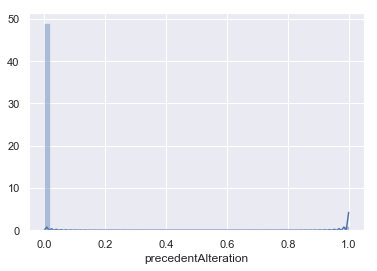

In [74]:

sns.distplot(data['precedentAlteration'].dropna())

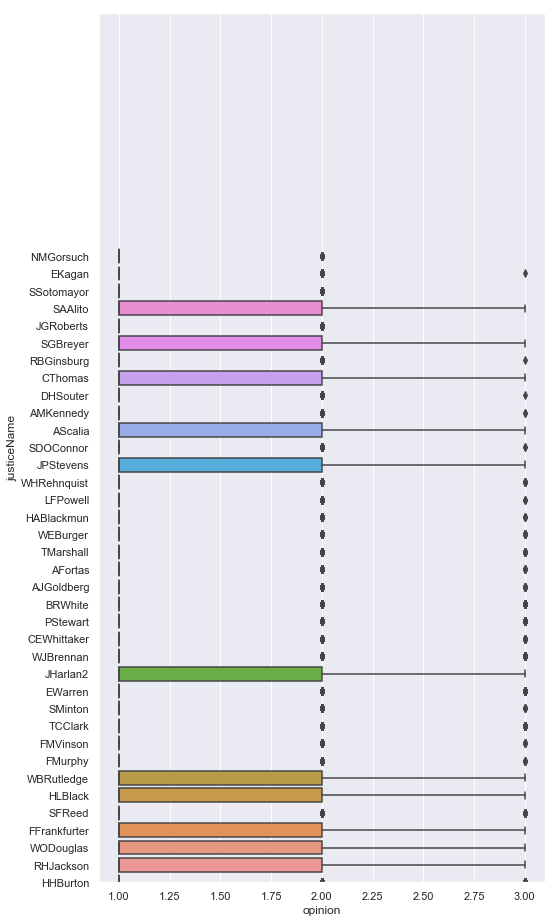

In [89]:
test = pd.concat([data['justiceName'], data['opinion']], axis=1)
f, ax = plt.subplots(figsize=(8, 16))
fig = sns.boxplot(x='opinion', y="justiceName", data=test)
fig.axis(ymin=0, ymax=50);

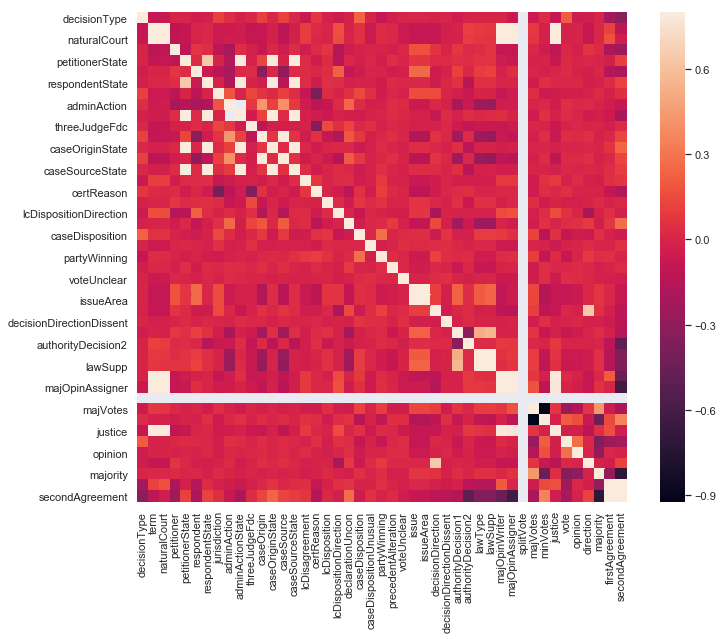

In [90]:
import matplotlib.pyplot as plt
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

/anaconda3/envs/partisan/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/envs/partisan/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/partisan/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


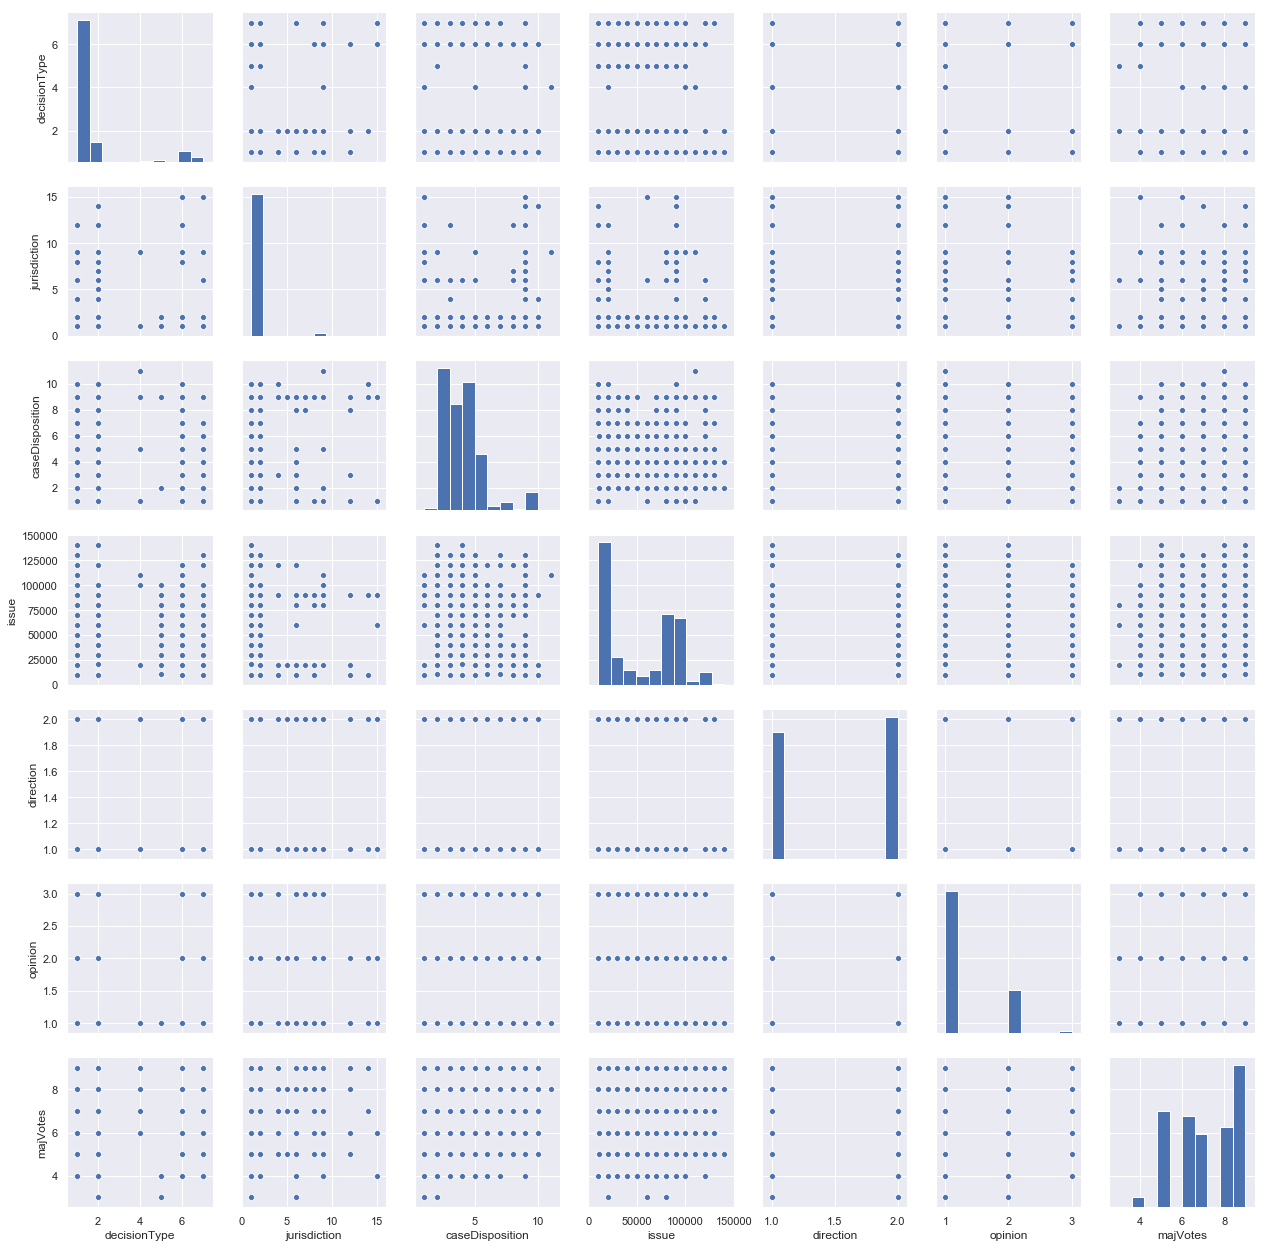

In [93]:
# Looking at corellation maps through array of scatter plots
sns.set()
cols = ['decisionType', 'jurisdiction', 'caseDisposition', 'issue', 'direction', 'opinion', 'majVotes']
sns.pairplot(data[cols], size = 2.5)
plt.show();

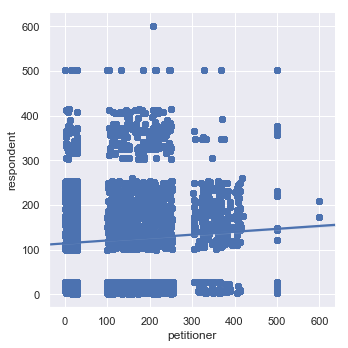

In [102]:
sns.lmplot(x='petitioner', y='respondent', data=data)

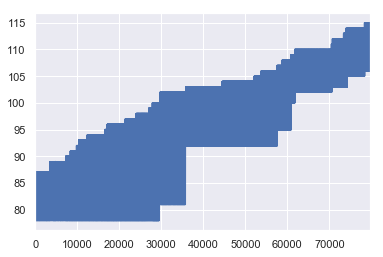

In [15]:
data[''].plot()

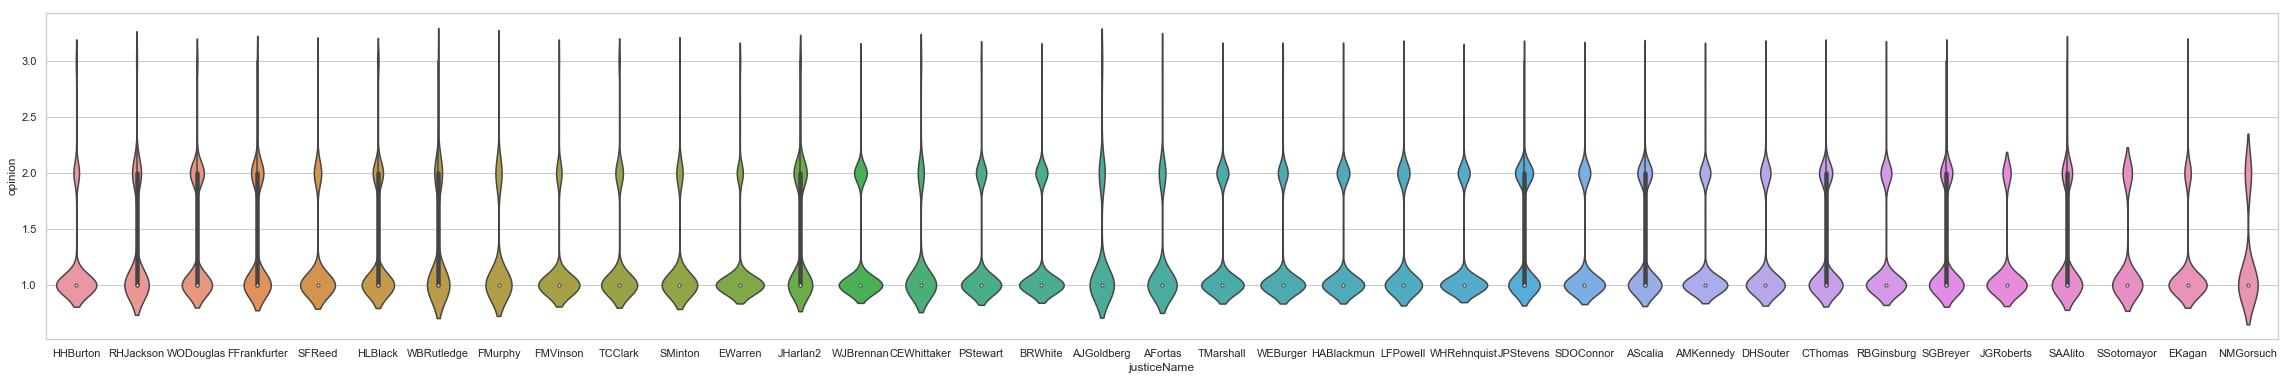

In [113]:
# Set theme
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(40, 6))
# Violin plot
sns.violinplot(x='justiceName', y='opinion', data=data)

In [114]:

# Melt DataFrame
melted_df = pd.melt(data, 
                    id_vars=["justiceName", "opinion", "direction"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,justiceName,opinion,direction,Stat,value
0,HHBurton,1.0,1.0,caseId,1946-001
1,RHJackson,1.0,2.0,caseId,1946-001
2,WODouglas,1.0,2.0,caseId,1946-001
3,FFrankfurter,2.0,2.0,caseId,1946-001
4,SFReed,1.0,2.0,caseId,1946-001


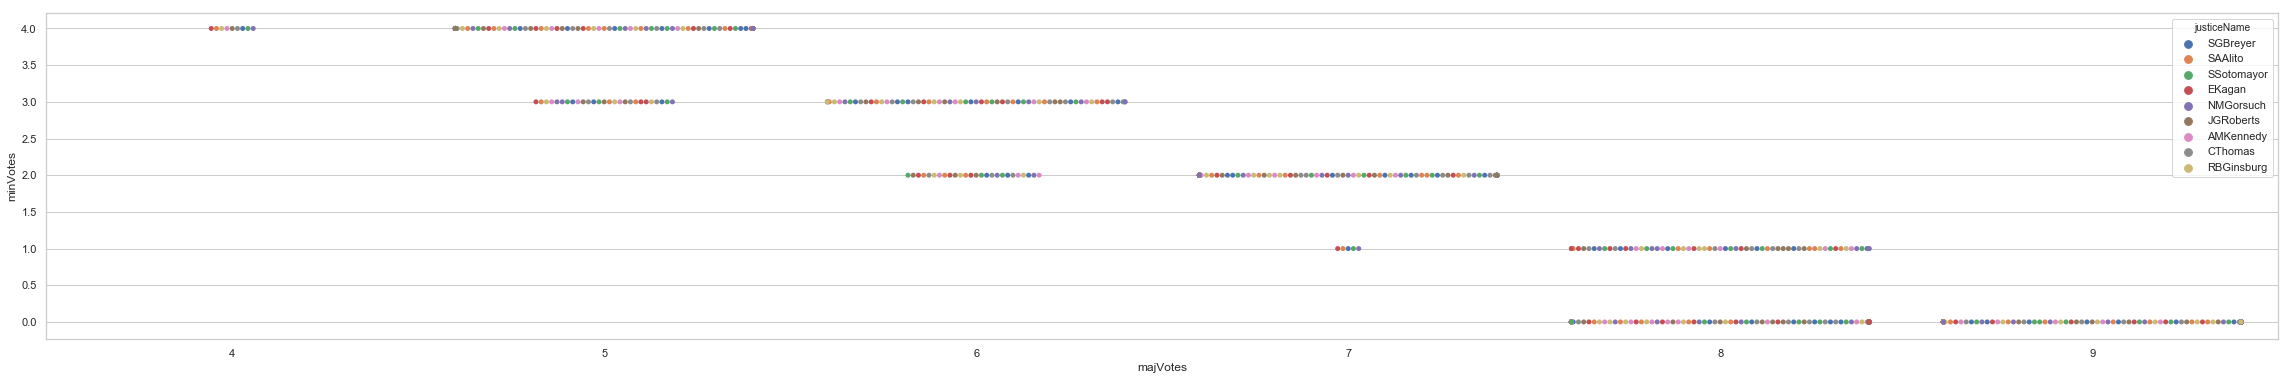

In [128]:
f, ax = plt.subplots(figsize=(40, 6))
sns.swarmplot(x='majVotes', y='minVotes', data=data[-1000:], 
              hue='justiceName')


KeyboardInterrupt: 

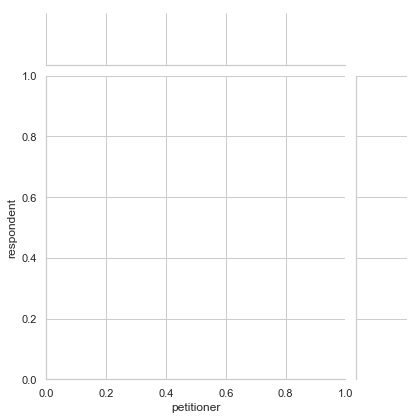

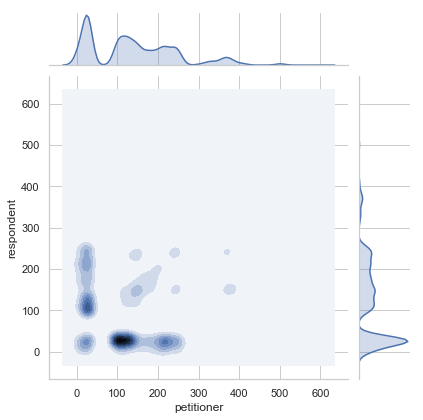

In [138]:
sns.jointplot(x="petitioner", y="respondent", data=data, kind="kde");

In [27]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y)  
    plt.show()


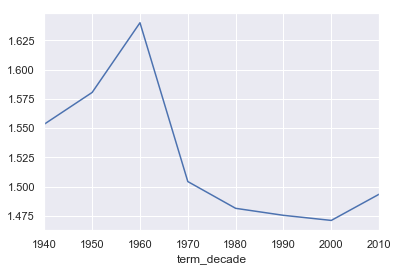

In [34]:
data.loc[:, "term_decade"] = (data["term"] / 10).astype(int) * 10.0
decade_reverse_rate = data.groupby("term_decade")["direction"].mean()
decade_reverse_rate.plot()

/anaconda3/envs/partisan/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


NameError: name 'numpy' is not defined

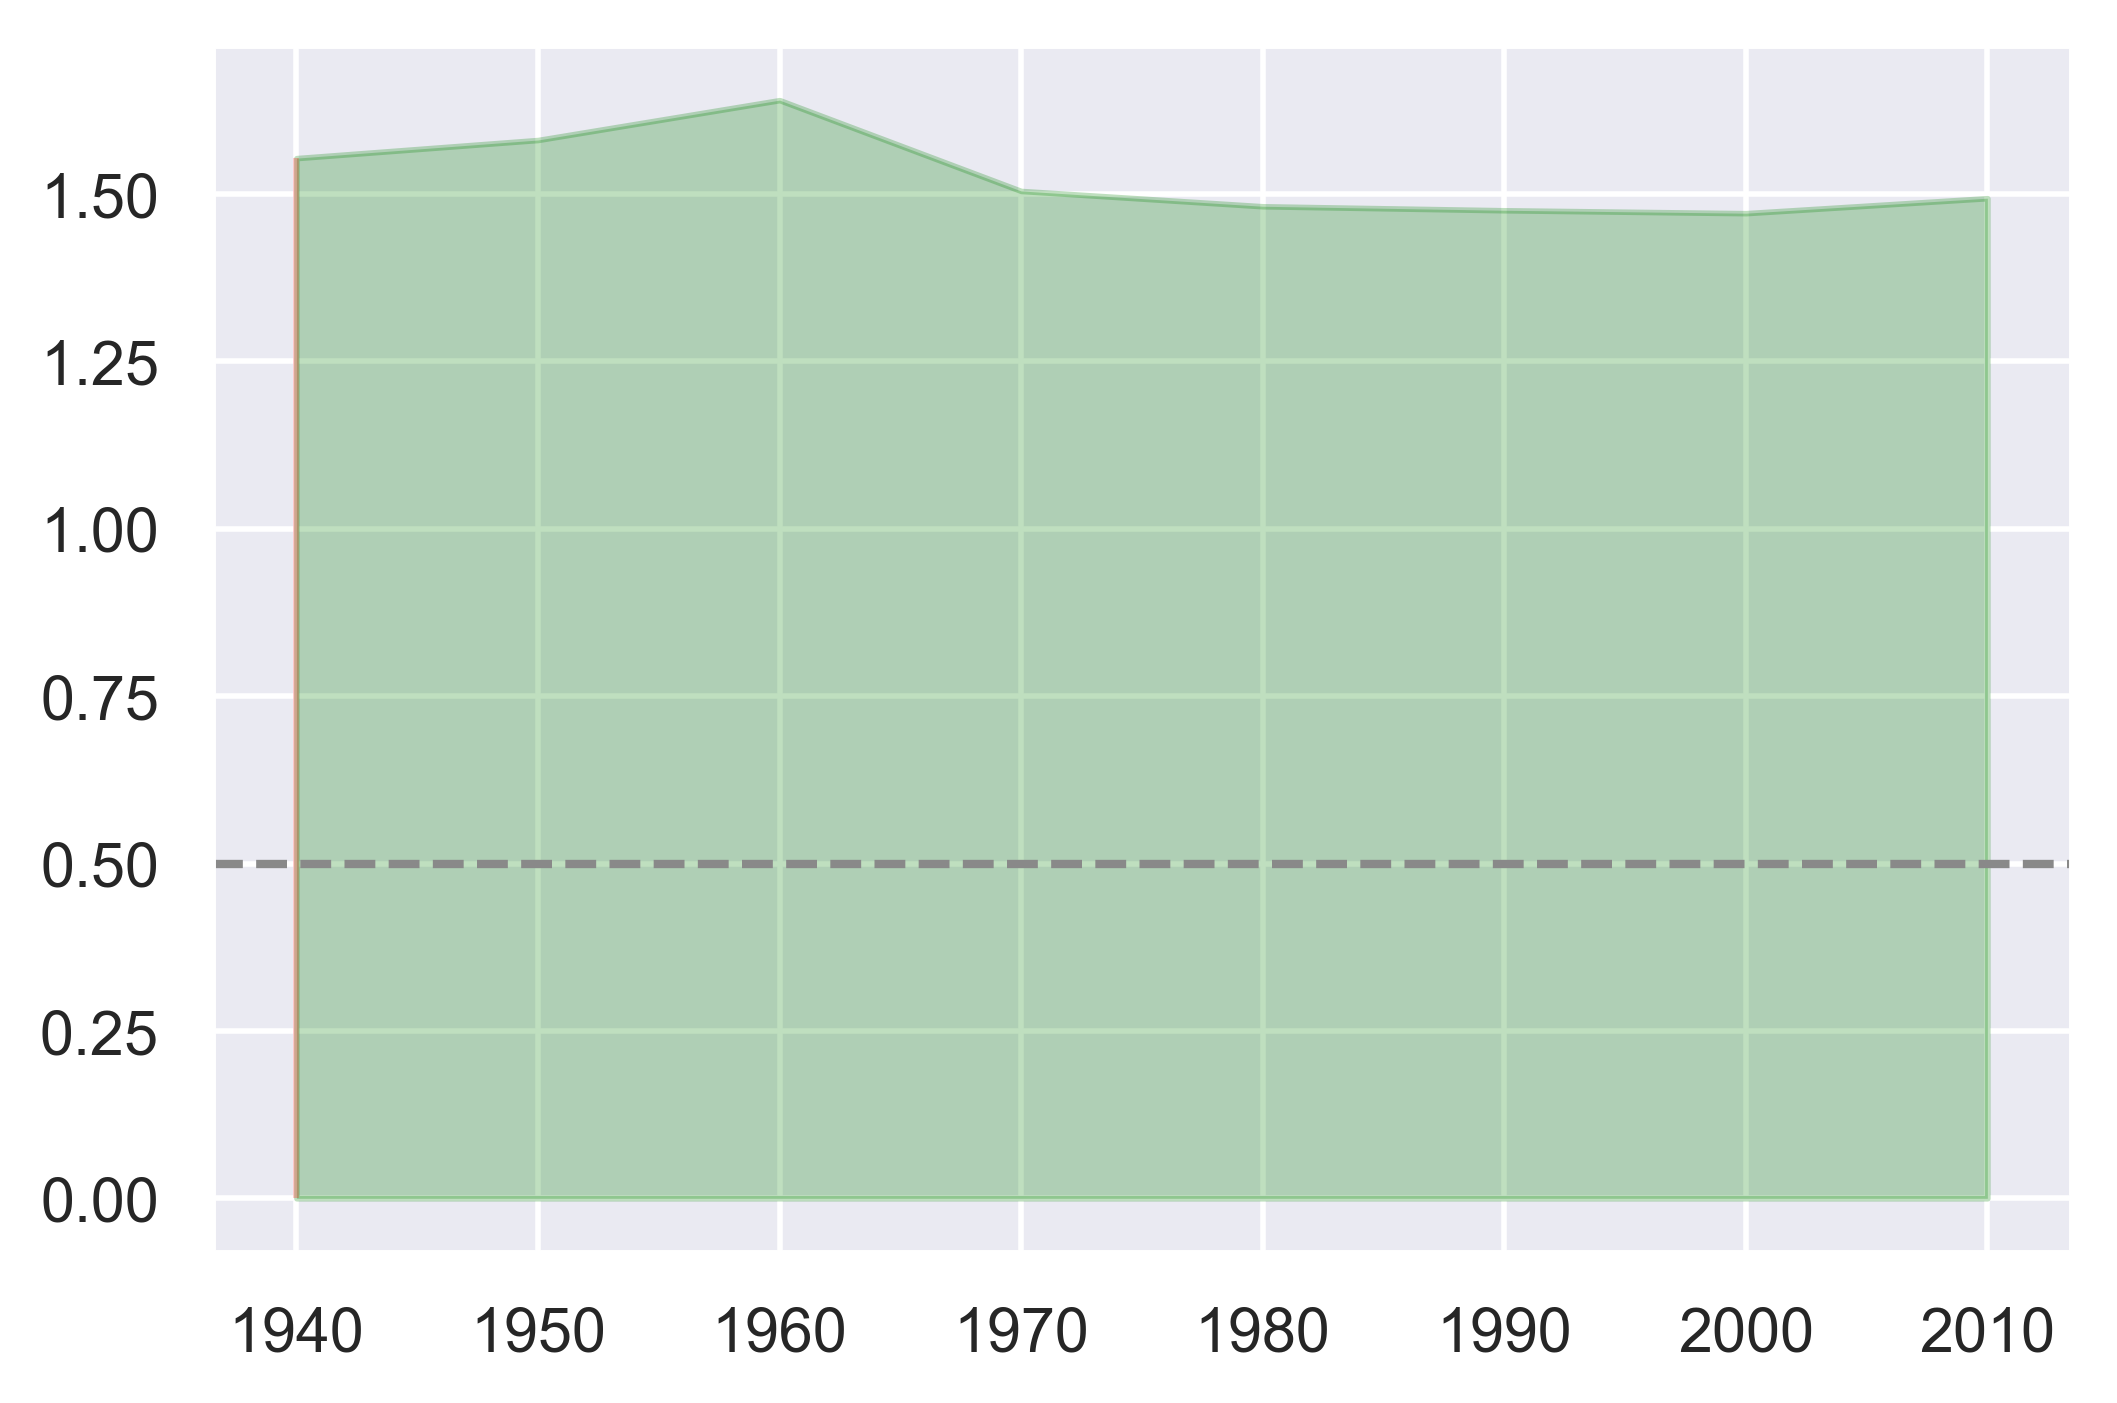

In [35]:
#Setup grid
f = plt.figure(figsize=(6, 4), dpi=400)
ax = plt.gca()

# Handle justice accuracy
ax_id = 0
column_name = "Reversal Rate by Decade"

# Setup title and data
#ax.set_title("{0}".format(column_name), fontsize=10)
ts_data = decade_reverse_rate
min_term = int(ts_data.index.min())
max_term = int(ts_data.index.max())
min_val = 0.0
max_val = 1.0

# Plot fill and marker
ax.axhline(0.5, linestyle='--', color='#898989') # horizontal lines
ax.fill_between(ts_data.index, 0, ts_data, where=(ts_data >= 0.5), alpha=0.25, color="green", interpolate=False)
ax.fill_between(ts_data.index, 0, ts_data, where=(ts_data <= 0.5), alpha=0.25, color="red", interpolate=False)
ax.fill_between(ts_data.loc[[1930,1940]].index, 0, ts_data.loc[[1930,1940]], alpha=0.25, color="red", interpolate=False)

# Setup axes ranges
decade_range = numpy.arange(min_term, max_term, 10)
decade_range = numpy.append(decade_range, 2010)
reverse_range = numpy.round(numpy.linspace(min_val, max_val, 5), 4)

# Set on axis
_ = ax.set_xlim(min_term, max_term)
_ = ax.set_xticks(decade_range)
_ = ax.set_xticklabels(map(str, decade_range), fontdict=plos_one_fontdict, rotation=90)
_ = ax.set_ylim(min_val, max_val)
_ = ax.set_yticks(reverse_range)
_ = ax.set_yticklabels(map(lambda x: "{0}%".format(int(x * 100)), reverse_range), fontdict=plos_one_fontdict)

# Set axis label
_ = ax.set_xlabel("Term", fontdict=plos_one_fontdict)
_ = ax.set_ylabel("Reversal Rate (%)", fontdict=plos_one_fontdict)

In [38]:

# Evaluation range
term_range = data.loc[~data.loc[:, "rf_predicted"].isnull(), "term"].unique()
evaluation_index = data.loc[:, "term"].isin(term_range)
target_actual = (data.loc[evaluation_index, "justice_outcome_disposition"]).astype(int)
target_predicted = data.loc[evaluation_index, "rf_predicted"].astype(int)
target_dummy = data.loc[evaluation_index, "dummy_predicted"].astype(int)

# Compare model
print("RF model")
print("="*32)
justice_confusion_df = pandas.DataFrame(sklearn.metrics.confusion_matrix(target_actual, target_predicted), columns=["Other", "Affirm", "Reverse"], index=["Other", "Affirm", "Reverse"])
justice_confusion_df

KeyError: 'rf_predicted'

In [39]:
print(justice_confusion_df.to_latex())


NameError: name 'justice_confusion_df' is not defined

In [40]:
data.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement,term_decade
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN,1940.0
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN,1940.0
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,1,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN,1940.0
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,1,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN,1940.0
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,1,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN,1940.0


In [43]:
# Setup feature importance TS
feature_importance_ts = data.groupby(["term"])["importance"].mean().unstack()

# Get last step weights
num_feature_rows = 3
num_feature_cols = 3
num_feature_total = num_feature_rows * num_feature_cols
last_step = feature_importance_ts.tail(1).T
last_step_top_features = last_step.sort_values(last_step.columns[0], ascending=False).head(num_feature_total).index.tolist()

# Get axis data
min_term = data["term"].min()
max_term = data["term"].max()
min_val = data["importance"].min()
max_val = data["importance"].max()

# Setup grid
#f = plt.figure(figsize=(16, 16))
f, ax = plt.subplots(num_feature_rows, num_feature_cols, figsize=(12,16))

for i in range(len(last_step_top_features)):
    # Get iteration indices
    row_id = int(i / num_feature_cols)
    col_id = (i % num_feature_cols)
    feature_name = last_step_top_features[i]
    
    # Setup title and data
    ax[row_id, col_id].set_title("{0}".format(feature_name), fontsize=10)
    ts_data = feature_importance_ts.loc[:, feature_name]
    
    # Plot fill and marker
    ax[row_id, col_id].fill_between(ts_data.index, 0, ts_data, alpha=0.25, color="green")
    ax[row_id, col_id].plot(ts_data.index, ts_data, marker="o", markersize=3, linewidth=2, color="#898989", alpha=0.75)
    
    # Setup axes
    ax[row_id, col_id].set_xlim(min_term, max_term)
    ax[row_id, col_id].set_xticks(numpy.arange(min_term, max_term, 10))
    ax[row_id, col_id].set_xticklabels(map(str, numpy.arange(min_term, max_term, 10)), rotation=90)
    ax[row_id, col_id].set_ylim(min_val, max_val)
    ax[row_id, col_id].set_yticks(numpy.round(numpy.linspace(min_val, max_val, 4), 3))

KeyError: 'Column not found: importance'

In [47]:
colormap_list = [list(map(lambda x: float(x.strip(";")), r.split(","))) for r in """
0.910,0.000,0.552,0.737;
0.991,0.000,0.737,0.553;
1.000,0.000,0.907,0.286;
0.000,0.957,0.907,0.365;
0.000,0.712,0.475,0.769;
0.000,0.521,0.375,0.812;
""".strip().splitlines()]
custom_colormap = matplotlib.colors.ListedColormap(colormap_list)

/anaconda3/envs/partisan/lib/python3.6/site-packages/matplotlib/artist.py:913: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  return func(v)


NameError: name 'numpy' is not defined

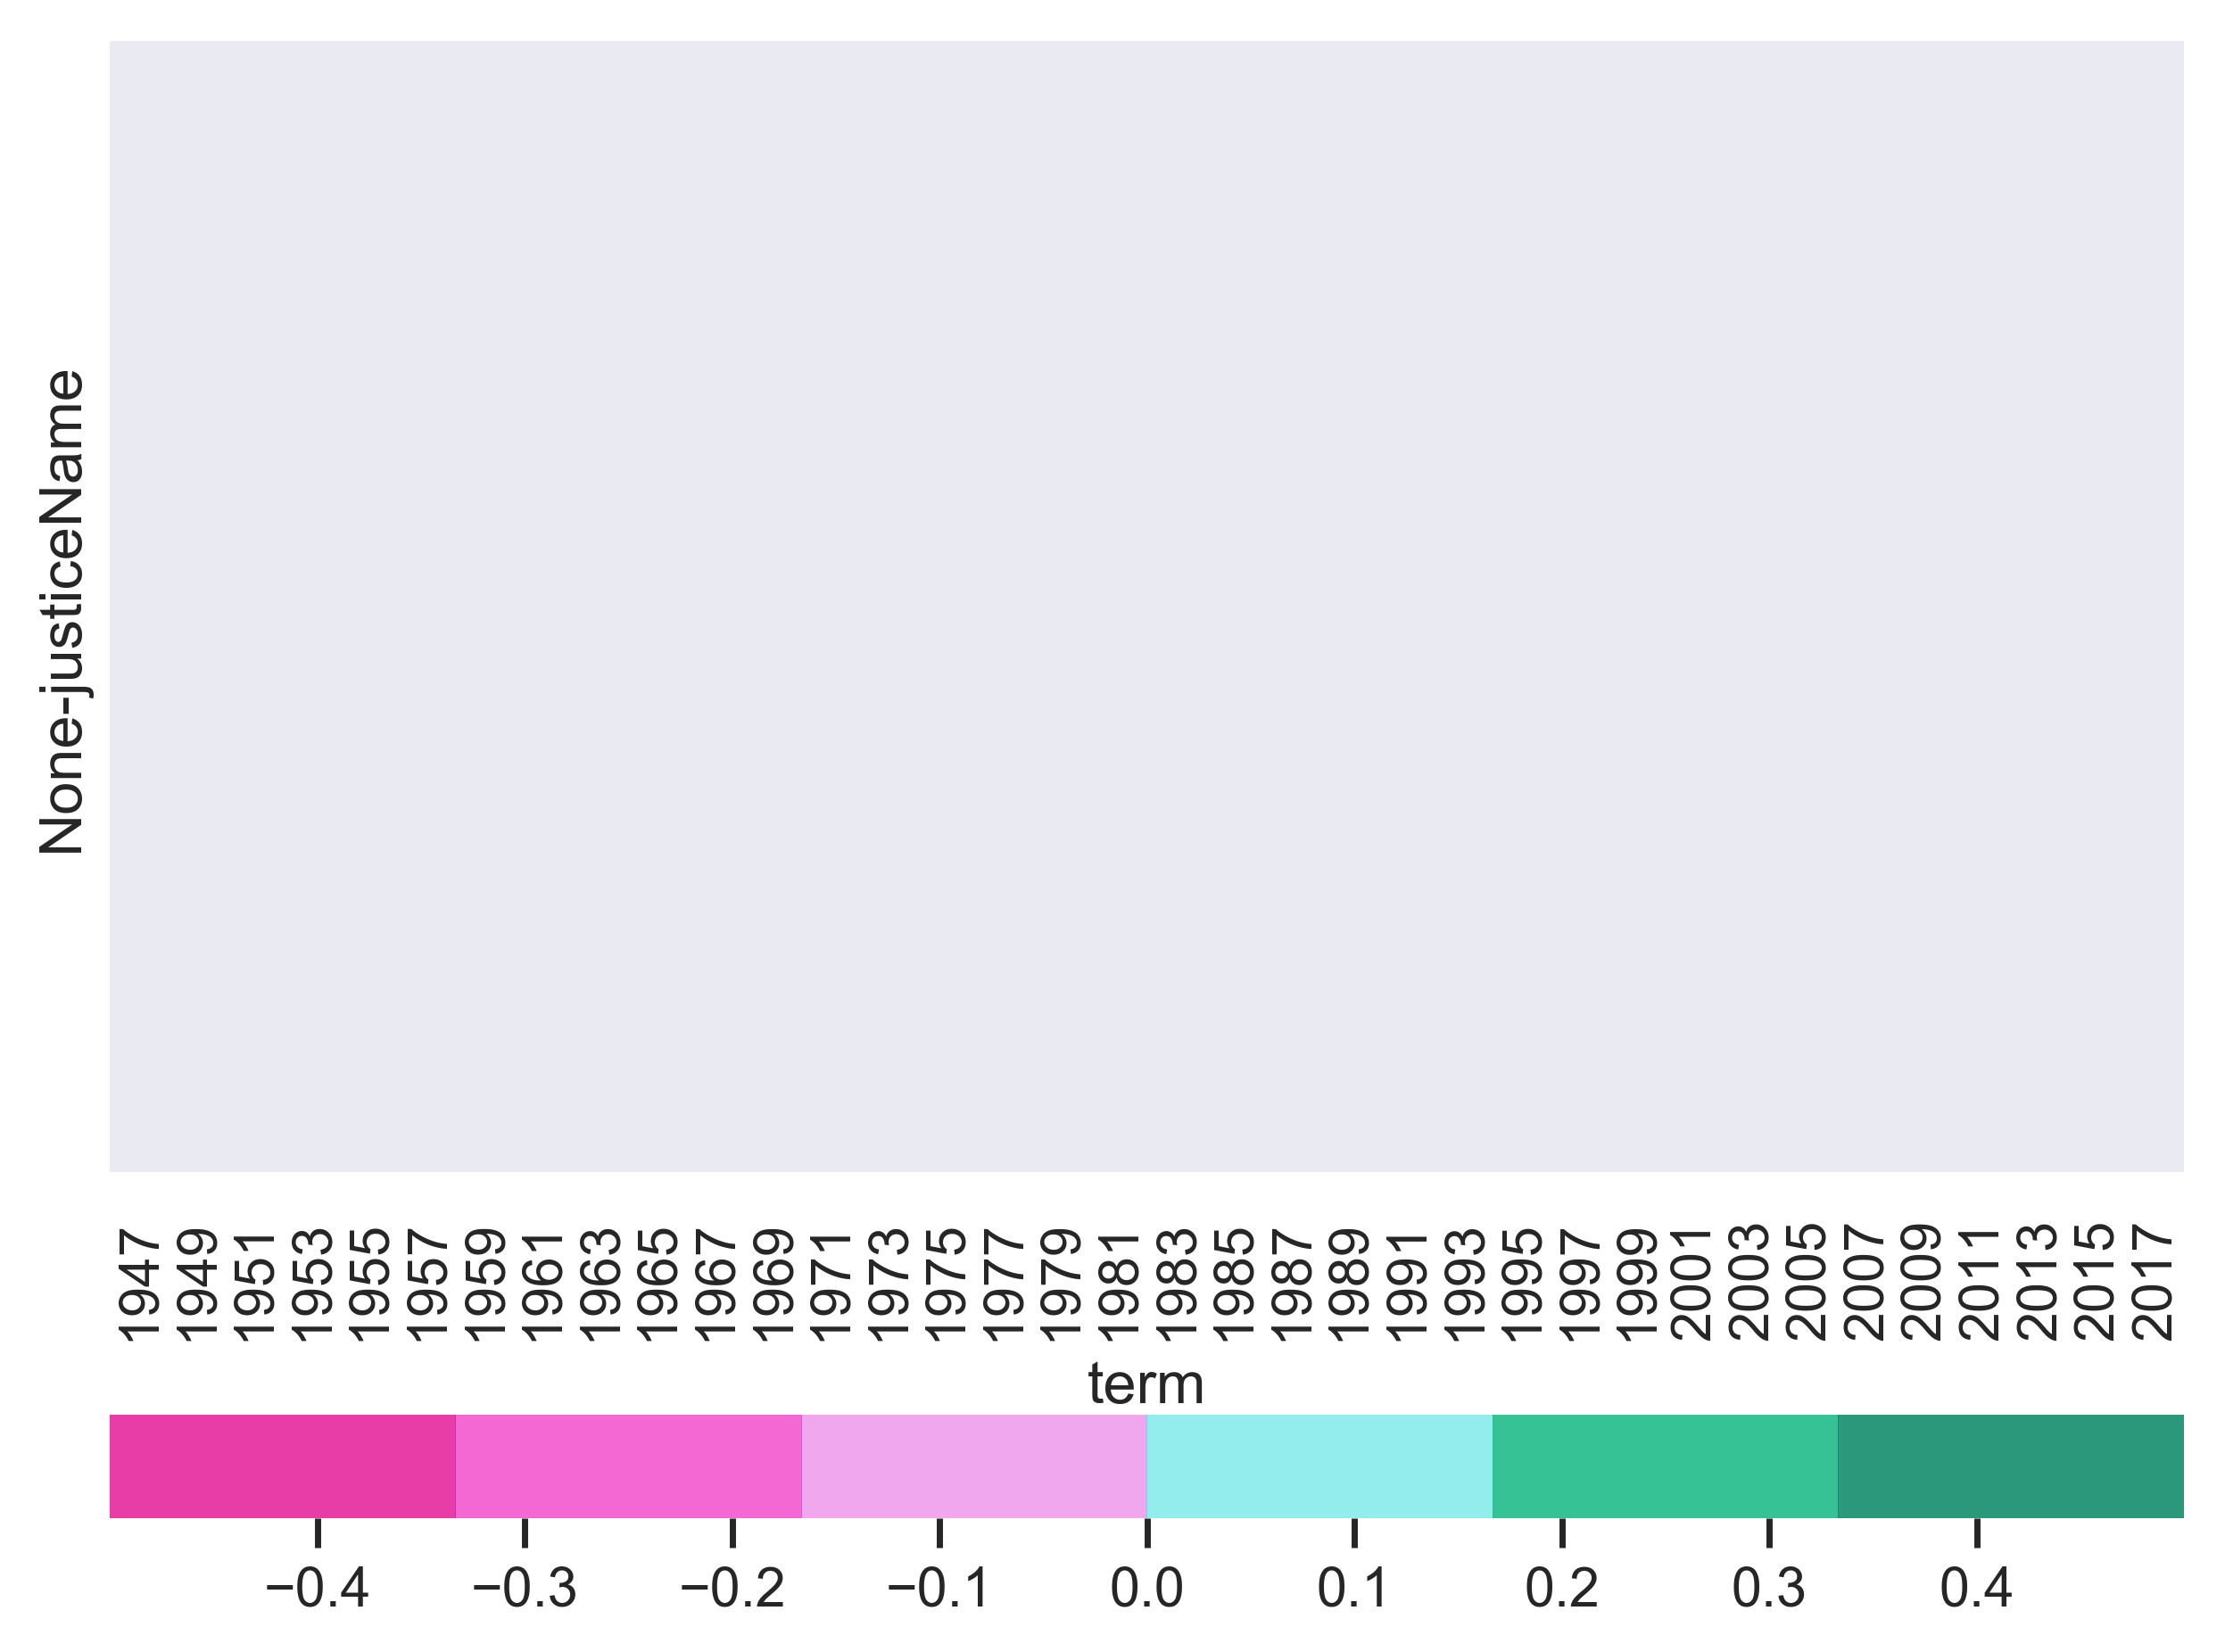

In [56]:
# Setup grouping over evaluation index
evaluation_index = raw_data.loc[:, "term"] & ~raw_data.loc[:, "direction"].isnull()
justice_order = raw_data.loc[evaluation_index, :].groupby(["justiceName"])["term"].min().sort_values().index.tolist()

if '-99' in justice_order:
    justice_order.remove('-99')
    
justice_accuracy_ts = raw_data.loc[evaluation_index, :].groupby(["term", "justiceName"]).mean().unstack() - \
    raw_data.loc[evaluation_index, :].groupby(["term", "justiceName"]).mean().unstack()
min_term = min(justice_accuracy_ts.index)
max_term = max(justice_accuracy_ts.index)
    
# Setup plot
num_justices = justice_accuracy_ts.shape[1]
num_years = justice_accuracy_ts.shape[0]

# Setup grid
f = plt.figure(figsize=(7.5, 6), dpi=400)
ax = plt.gca()
seaborn.heatmap(justice_accuracy_ts.loc[:, justice_order].T, vmin=-0.5, vmax=0.5, ax=ax, cmap=custom_colormap, cbar=True,
                linecolor='#898989', linewidths=0.002, cbar_kws={"orientation": "horizontal", "ticks": [-0.4, -0.3, -0.2, -0.1, 0.0,
                                                                                                       0.1, 0.2, 0.3, 0.4]})

# Setup term labels
term_label_index = numpy.arange(0, max_term - min_term, 10)
term_labels = [term_range[i] for i in term_label_index]
_ = ax.set_xticks(term_label_index)
_ = ax.set_xticklabels(map(str, term_labels), fontdict=plos_one_fontdict, rotation=90)

# Setup Justice labels
justice_label_index = numpy.arange(0, len(justice_order), 3)
justice_labels = list(reversed([justice_order[i] for i in justice_label_index]))

_ = ax.set_yticks(justice_label_index)
_ = ax.set_yticklabels(justice_labels, fontdict=plos_one_fontdict)

# Axis label
_ = ax.set_xlabel("Term", fontdict=plos_one_fontdict)
_ = ax.set_ylabel("Justice", fontdict=plos_one_fontdict)

# Draw grid
ax.grid()

# Save as PNG, PDF, and SVG
plt.savefig("../figures/justice_accuracy_heatmap.png", dpi=400)
plt.savefig("../figures/justice_accuracy_heatmap.tif", dpi=400)
plt.savefig("../figures/justice_accuracy_heatmap.pdf", dpi=400)
plt.savefig("../figures/justice_accuracy_heatmap.svg")

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [7]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 33))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
63689/63689 [==============================] - 26s 413us/step - loss: nan - acc: 0.9975
Epoch 2/100
63689/63689 [==============================] - 24s 382us/step - loss: nan - acc: 0.9863
Epoch 3/100
63689/63689 [==============================] - 31s 484us/step - loss: nan - acc: 0.9821
Epoch 4/100
63689/63689 [==============================] - 33s 513us/step - loss: nan - acc: 0.9821
Epoch 5/100
63689/63689 [==============================] - 34s 532us/step - loss: nan - acc: 0.9821
Epoch 6/100
63689/63689 [==============================] - 38s 594us/step - loss: nan - acc: 0.9821
Epoch 7/100
63689/63689 [==============================] - 33s 512us/step - loss: nan - acc: 0.9821
Epoch 8/100
55120/63689 [========================>.....] - ETA: 4s - loss: nan - acc: 0.9818

KeyboardInterrupt: 

In [ ]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)